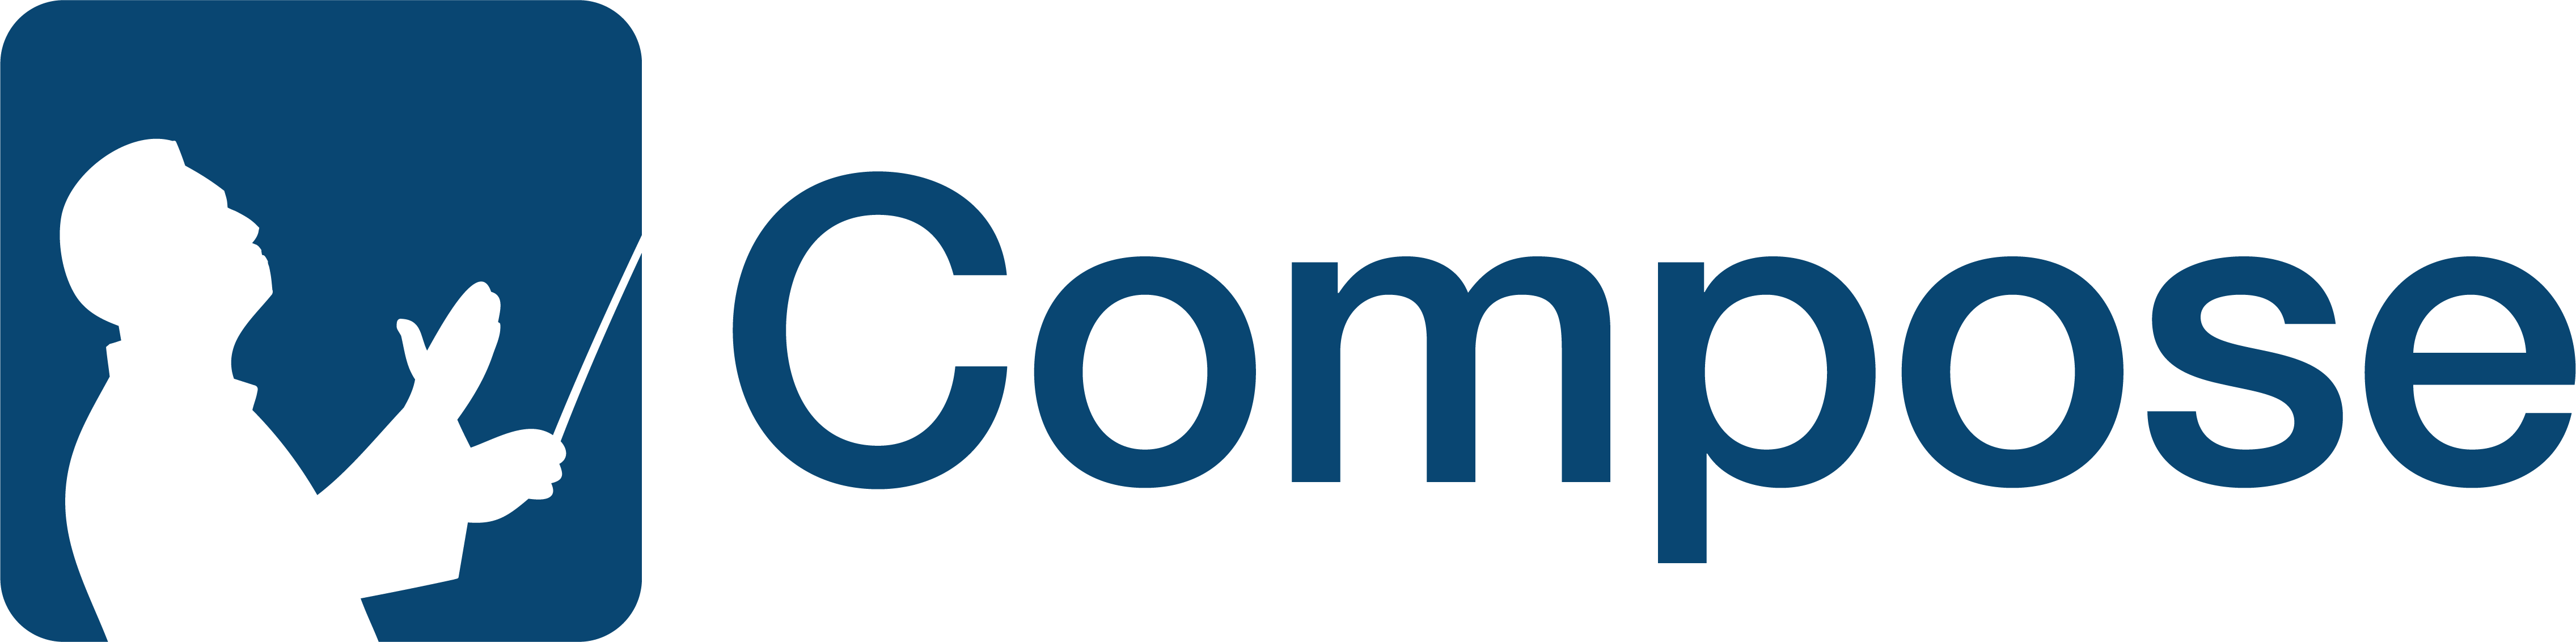

In [1]:
#!pip install composeml

In [2]:
%matplotlib inline
import composeml as cp

## Problem
 Label whether the total purchase amount over the next hour of transactions will exceed $300. 

In [3]:
df = cp.demos.load_transactions()

In [4]:
df.head()

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth,brand
0,298,1,2014-01-01 00:00:00,5,127.64,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18 00:00:00,A
1,10,1,2014-01-01 00:09:45,5,57.39,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18 00:00:00,A
2,495,1,2014-01-01 00:14:05,5,69.45,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18 00:00:00,A
3,460,10,2014-01-01 02:33:50,5,123.19,2,tablet,2014-01-01 02:31:40,13244,2012-04-15 23:31:04,1986-08-18 00:00:00,A
4,302,10,2014-01-01 02:37:05,5,64.47,2,tablet,2014-01-01 02:31:40,13244,2012-04-15 23:31:04,1986-08-18 00:00:00,A


### Creating labeling function

In [5]:
def total_spent(df):
    total = df['amount'].sum()
    return total

### Creating label maker

In [6]:
label_maker = cp.LabelMaker(
    target_entity="customer_id",
    time_index="transaction_time",
    labeling_function=total_spent,
    window_size="1h",
)

### Search labels
It is now time to search and extract the labels. This can be done via LabelMaker.search method

In [7]:
labels = label_maker.search(
    df.sort_values('transaction_time'),
    num_examples_per_instance=-1,
    gap=1,
    verbose=True,
)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████| customer_id: 5/5 


In [8]:
labels.head()

,customer_id,cutoff_time,total_spent
id,,,
0,1,2014-01-01 00:45:30,914.73
1,1,2014-01-01 00:46:35,806.62
2,1,2014-01-01 00:47:40,694.09
3,1,2014-01-01 00:52:00,687.80
4,1,2014-01-01 00:53:05,656.43


### Transform label

In [9]:
labels = labels.threshold(300)

In [10]:
labels.head()

,customer_id,cutoff_time,total_spent
id,,,
0,1,2014-01-01 00:45:30,True
1,1,2014-01-01 00:46:35,True
2,1,2014-01-01 00:47:40,True
3,1,2014-01-01 00:52:00,True
4,1,2014-01-01 00:53:05,True


In [11]:
#The prediction had to be done one hour advance
labels = labels.apply_lead('1h')
labels.head()

,customer_id,cutoff_time,total_spent
id,,,
0,1,2013-12-31 23:45:30,True
1,1,2013-12-31 23:46:35,True
2,1,2013-12-31 23:47:40,True
3,1,2013-12-31 23:52:00,True
4,1,2013-12-31 23:53:05,True


## How it works



* Github https://github.com/FeatureLabs/compose

* Documentation - https://compose.featurelabs.com/en/latest/index.html

A list of annotation tools for labeling images and text from across the web.
https://www.datasetlist.com/tools/